In [1]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# reading the dataset into a pandas dataframe
df = pd.read_csv('C:\\Users\\admin\\Downloads\\online-news-popularity (1).csv', index_col=0)
print(df.shape)
df.head()

(39644, 60)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# checking for missing data and viewing statistics 
display(df.info())
display(df.describe().round(3))

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  floa

None

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,...,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000
mean,354.530,10.399,546.515,0.548,0.996,0.689,10.884,3.294,4.544,1.250,...,0.095,0.757,-0.260,-0.522,-0.108,0.282,0.071,0.342,0.156,3395.380
std,214.164,2.114,471.108,3.521,5.231,3.265,11.332,3.855,8.309,4.108,...,0.071,0.248,0.128,0.290,0.095,0.324,0.265,0.189,0.226,11626.951
min,8.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,0.000,0.000,1.000
25%,164.000,9.000,246.000,0.471,1.000,0.626,4.000,1.000,1.000,0.000,...,0.050,0.600,-0.328,-0.700,-0.125,0.000,0.000,0.167,0.000,946.000
50%,339.000,10.000,409.000,0.539,1.000,0.690,8.000,3.000,1.000,0.000,...,0.100,0.800,-0.253,-0.500,-0.100,0.150,0.000,0.500,0.000,1400.000
75%,542.000,12.000,716.000,0.609,1.000,0.755,14.000,4.000,4.000,1.000,...,0.100,1.000,-0.187,-0.300,-0.050,0.500,0.150,0.500,0.250,2800.000
max,731.000,23.000,8474.000,701.000,1042.000,650.000,304.000,116.000,128.000,91.000,...,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.500,1.000,843300.000


# Explore shares Target

In [5]:
# testing lengths to separate the classes
value = 1400
t = df[' shares']

for i in range(6): # print and increment test value by 25, 6 times
    print(f"Number of rows below {value}: ", 
          len(df[t < value]))
    value += 25

Number of rows below 1400:  18490
Number of rows below 1425:  20082
Number of rows below 1450:  20082
Number of rows below 1475:  20082
Number of rows below 1500:  20082
Number of rows below 1525:  21405


In [6]:
# viewing column labels
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [7]:
# make replacements in the listed names
df.columns = df.columns.str.replace(
    ' ',
    ''
).str.replace(
    'num_', 'n'
).str.replace(
    'tokens_', ''
).str.replace(
    'is_', ''
).str.replace(
    'data_', ''
).str.replace(
    'day', ''
).str.replace(
    'week_is', ''
).str.replace(
    'ectivity', ''
).str.replace(
    'arity', ''
).str.replace(
    'entertainment', 'ent'
).str.replace(
    'reference', 'ref'
).str.replace(
    'sharess', 'shares'
).str.replace(
    'average', 'avg'
).str.replace(
    'positive', 'pos'
).str.replace(
    'negative', 'neg'
)

df.columns

Index(['timedelta', 'n_title', 'n_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'nhrefs', 'nself_hrefs',
       'nimgs', 'nvideos', 'avg_token_length', 'nkeywords',
       'channel_lifestyle', 'channel_ent', 'channel_bus', 'channel_socmed',
       'channel_tech', 'channel_world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'week_mon', 'week_tues',
       'week_wednes', 'week_thurs', 'week_fri', 'week_satur', 'week_sun',
       'weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subj', 'global_sentiment_pol', 'global_rate_pos_words',
       'global_rate_neg_words', 'rate_pos_words', 'rate_neg_words',
       'avg_pos_pol', 'min_pos_pol', 'max_pos_pol', 'avg_neg_pol',
       'min_neg_pol', 'max_neg_pol', 'title_subj', 'title_sentiment_pol',
       'abs_title_

FileNotFoundError: [Errno 2] No such file or directory: 'images/data-histograms.png'

<Figure size 2100x1300 with 0 Axes>

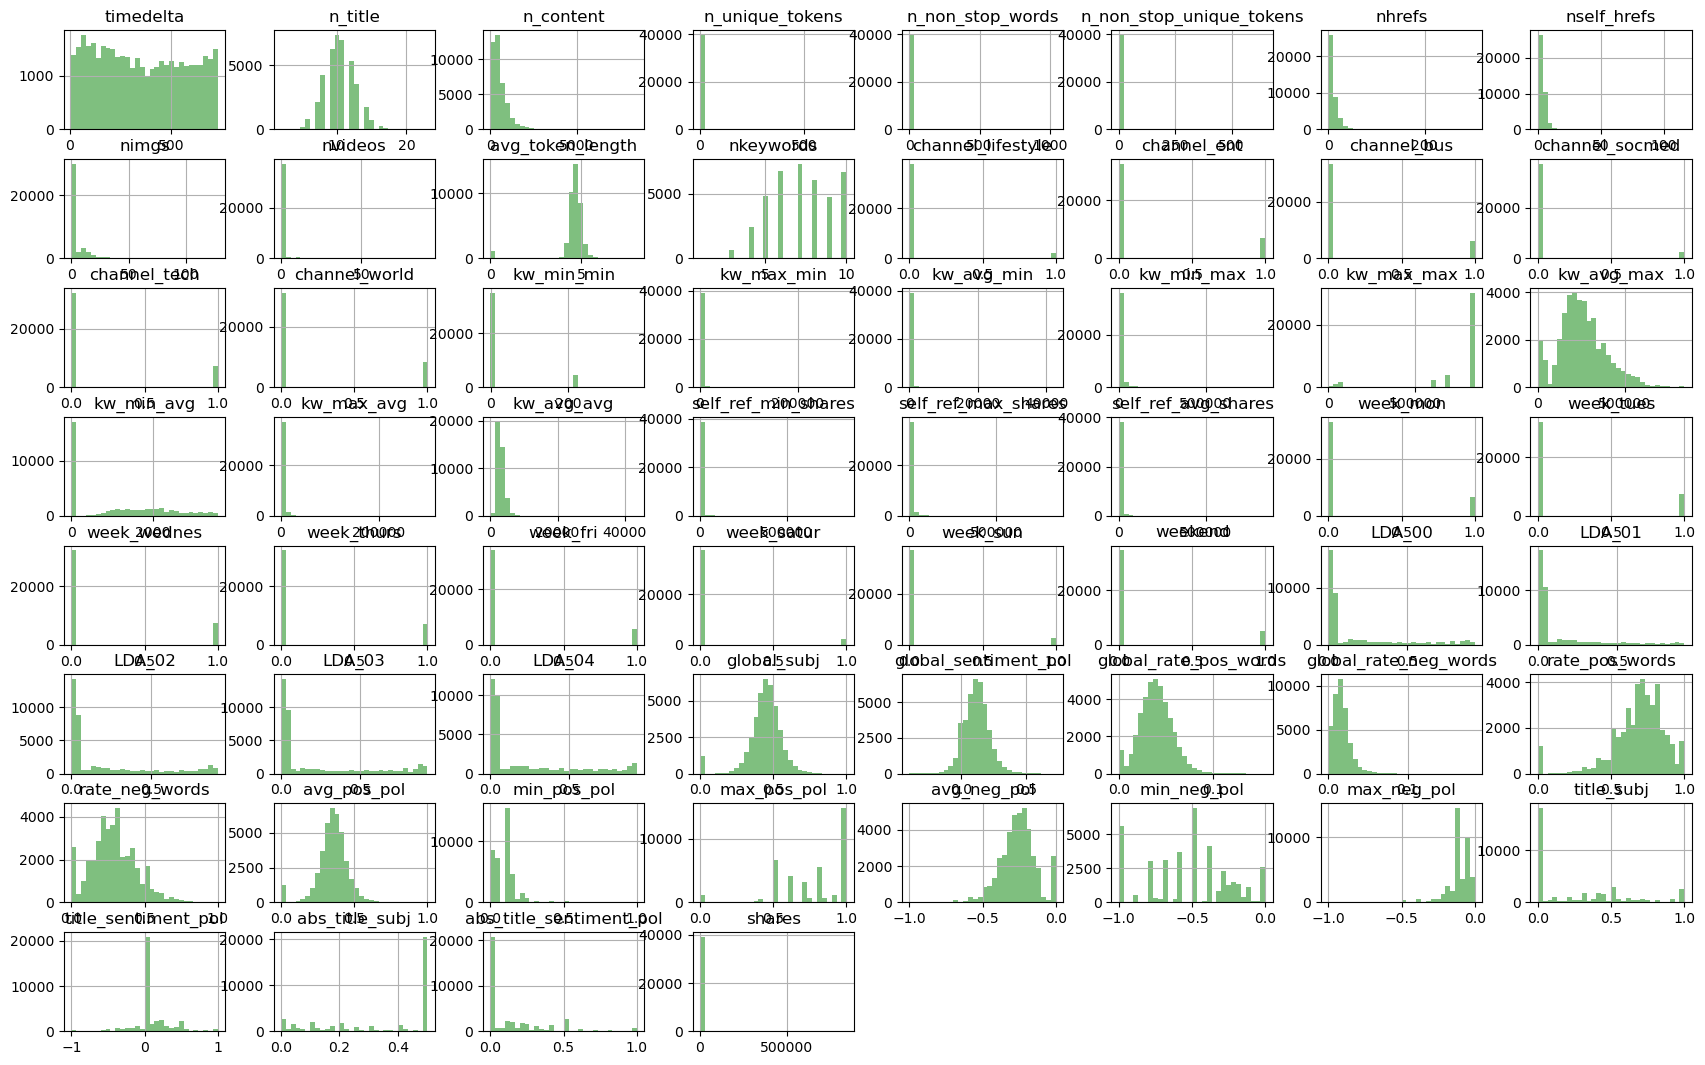

In [8]:
# viewing data histograms
plt.figure(figsize=(21, 13))

df.hist(bins=30, figsize= (21, 13), facecolor="green", alpha=0.5)
plt.title(r"Histogram for Online News Shares",
    fontsize=15)

plt.savefig('images/data-histograms.png', transparent=False)
plt.show()

# Visualizing Data Relationships

FileNotFoundError: [Errno 2] No such file or directory: 'images/correlations-heatmap.png'

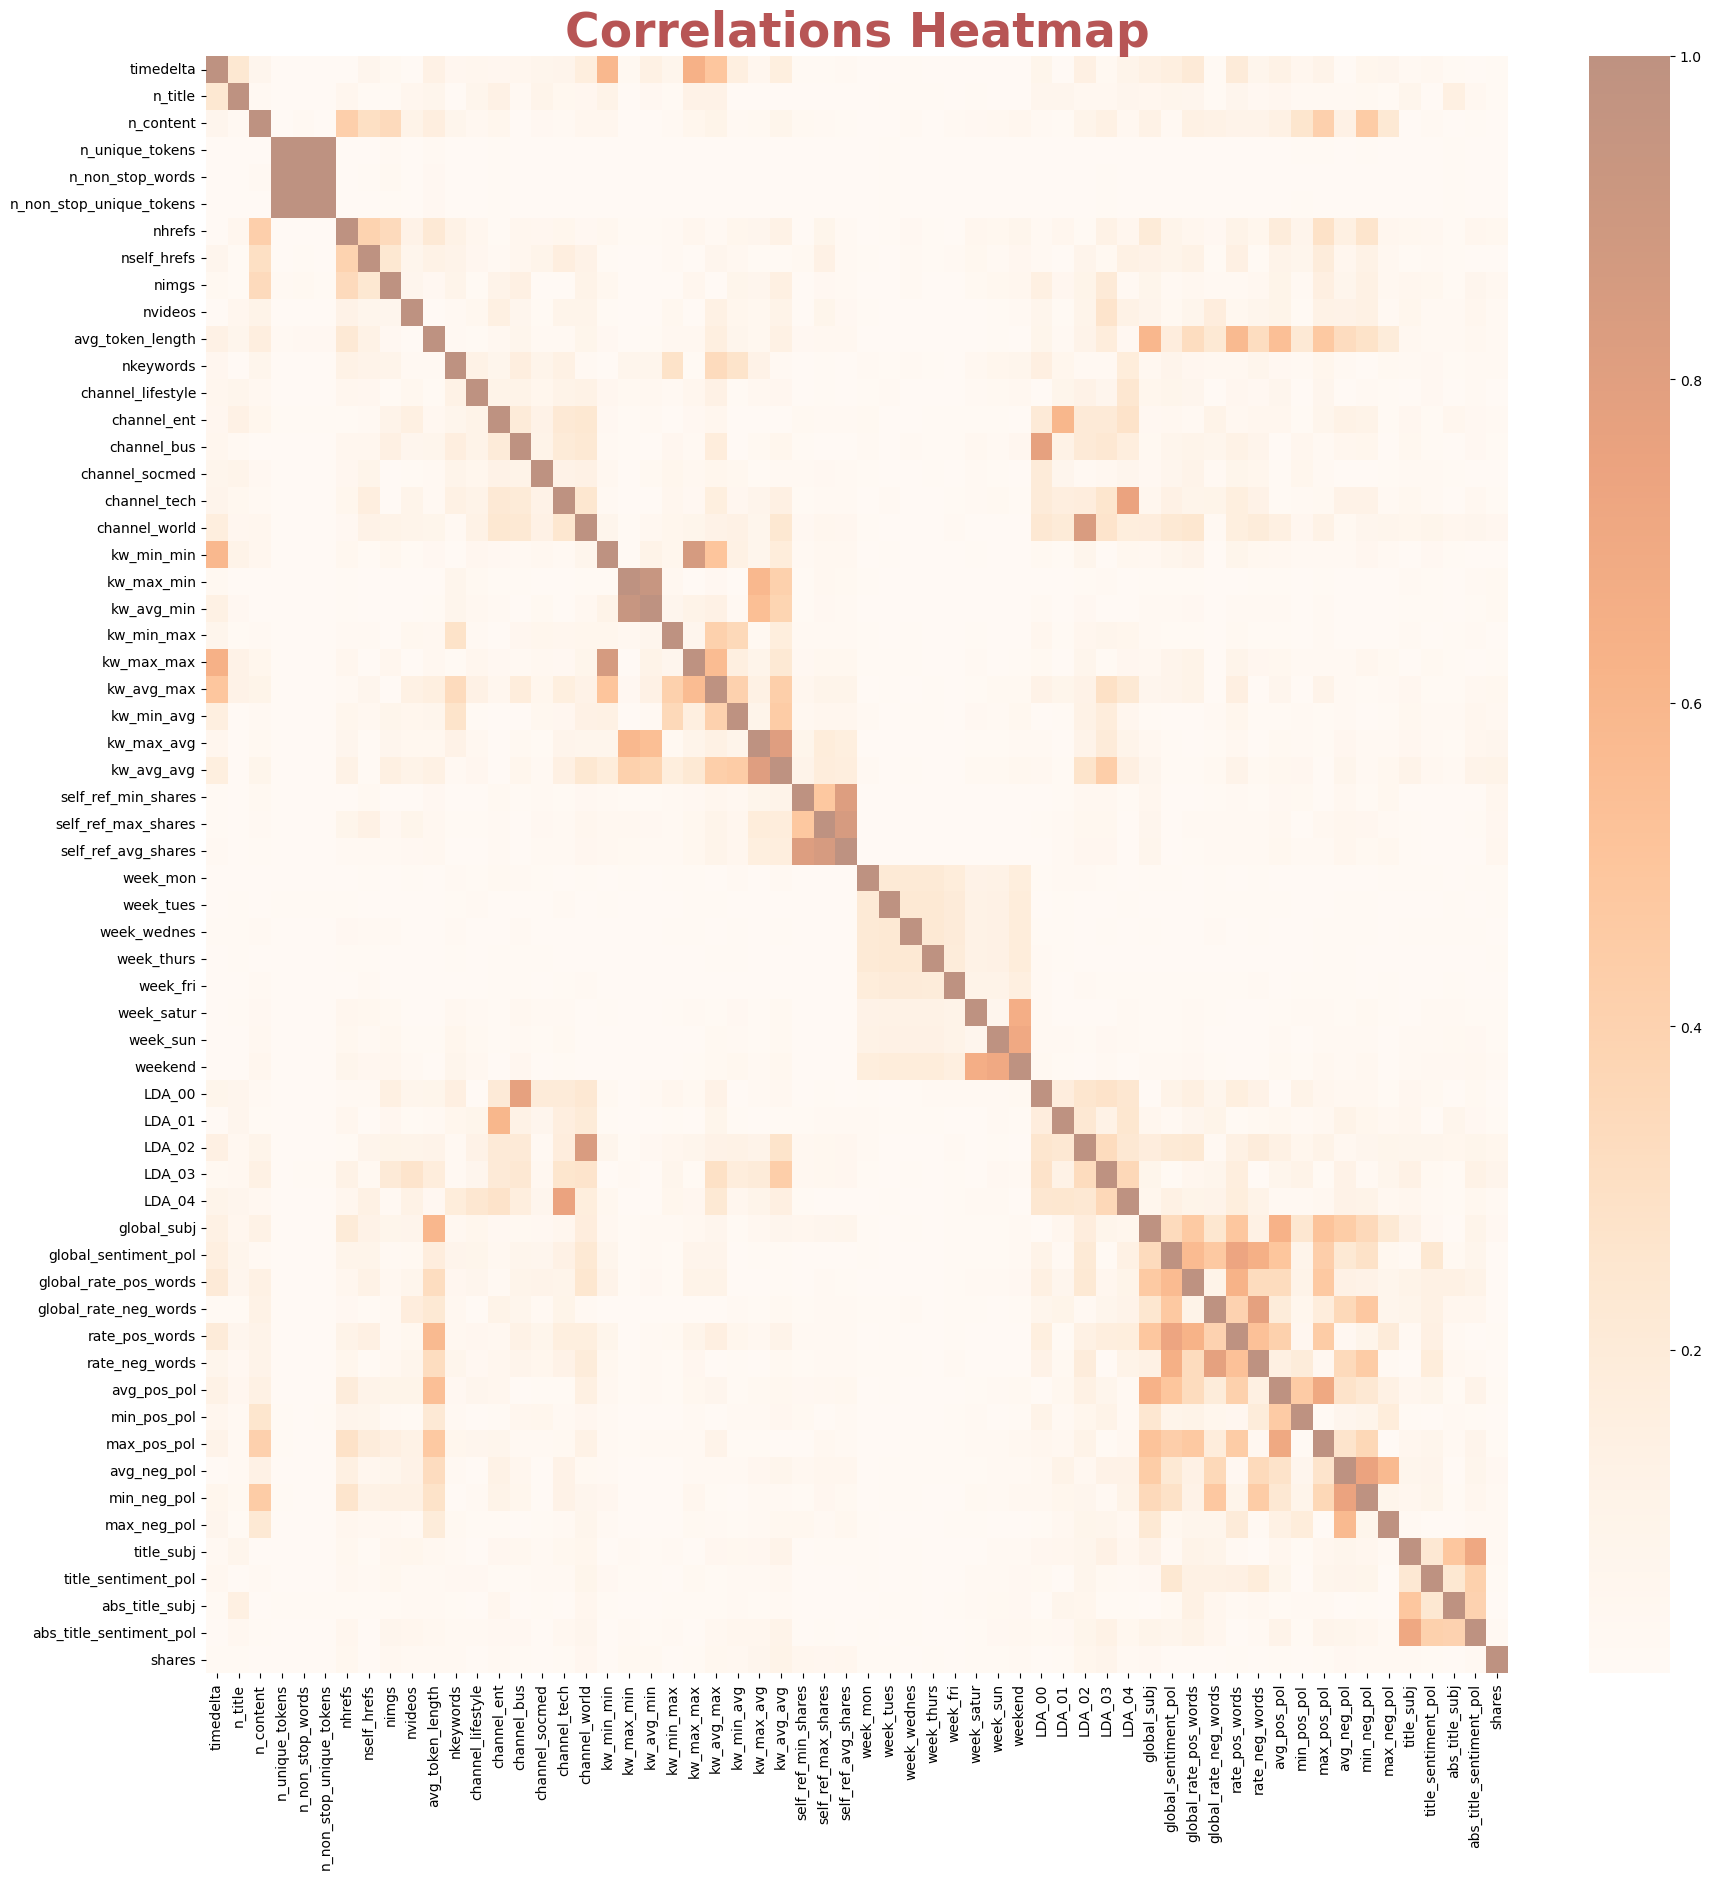

In [9]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(21, 21))
plt.title('Correlations Heatmap',
          fontdict={'fontsize': 34,
                    'color':  'brown',
                    'fontweight':  'bold'},
          alpha=.8)

sns.heatmap(corr.abs(),
            cmap="Oranges", alpha=.5,
            xticklabels=corr.columns,
            yticklabels=corr.columns
            )

plt.savefig('images/correlations-heatmap.png', transparent=False)
plt.show()

# Building a Target

In [10]:
# creating column (value = 1 for rows where `shares` is at least 1500)
df['Shares_plus'] = np.where(df['shares']>=1500, '1', '0').astype('int64')
df.Shares_plus.dtype

dtype('int64')

In [11]:
# viewing the first 10 rows
df[['shares', 'Shares_plus']].head(10)

,shares,Shares_plus
url,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,505,0
http://mashable.com/2013/01/07/beewi-smart-toys/,855,0
http://mashable.com/2013/01/07/bodymedia-armbandgets-update/,556,0
http://mashable.com/2013/01/07/canon-poweshot-n/,891,0
http://mashable.com/2013/01/07/car-of-the-future-infographic/,3600,1


# Explore and Model

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import DiscriminationThreshold, roc_auc


ModuleNotFoundError: No module named 'mlxtend'

In [13]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.4 MB 10.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 9.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00


In [22]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from .csv file
df_2 = pd.read_csv('C:\\Users\\admin\\Downloads\\online-news-popularity (1).csv',
                   index_col=0)

display(df_2.shape)
df_2.head()

(39644, 60)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
